<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_cats-vs-dogs_TFDS_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# =======================================================================================================
# PROBLEM C3
#
# Build a CNN based classifier for Cats vs Dogs dataset.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# This is unlabeled data, use ImageDataGenerator to automatically label it.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is originally published in https://www.kaggle.com/c/dogs-vs-cats/data
#
# Desired accuracy and validation_accuracy > 72%
# ========================================================================================================

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, _, logs={}):
        if logs.get('accuracy') > .80 and logs.get('val_accuracy') > .80:
          print("Cancelling training since val accuracy is greater than 80%")
          self.model.stop_training = True

def preprocess(image, label, target_height=224, target_width=224):
    """Normalizes images: `uint8` -> `float32` and resizes images
    by keeping the aspect ratio the same without distortion."""
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
    image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)  # Resize the image
    return image, label

def solution_model():

  (train_ds, val_ds), ds_info = tfds.load(name="cats_vs_dogs", split=['train[:80%]','train[80%:]'], as_supervised=True, with_info=True)

  #Derive labels count and names
  num_classes = ds_info.features['label'].num_classes
  class_names = ds_info.features['label'].names

  #Parameters
  batch_size = 32

  # Specify batch_size and map preprocessing function to dataset batch_size = 32
  train_data = train_ds.map(preprocess)
  train_data = train_data.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  val_data = val_ds.map(preprocess)
  val_data = val_data.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  model = tf.keras.models.Sequential([
  # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224,224,3)), #strides= 2, padding='same',
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax') #num of units is 1 since we're using sigmoid activation
  ])

  model.summary()

  #callbacks
  # callback = myCallback()
  MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
  RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
  ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=5,verbose=1,start_from_epoch=5)


  #Train and compile model
  lr = 0.0001 #1e-5
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  tf.keras.backend.clear_session()
  history = model.fit(train_data, validation_data=val_data, epochs=100, callbacks=[MCP, RLP, ES]) #ES, callback

  return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_model()
    model.save("mymodel.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [1]:
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorflow import keras
# import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# def preprocess(image, label, target_height=224, target_width=224):
#     """Normalizes images: `uint8` -> `float32` and resizes images
#     by keeping the aspect ratio the same without distortion."""
#     image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
#     image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)  # Resize the image
#     return image, label


In [3]:
# (train_ds, val_ds), ds_info = tfds.load(name="cats_vs_dogs", split=['train[:80%]','train[80%:]'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete0NMPLB/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
# train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
# #Derive labels count and names
# num_classes = ds_info.features['label'].num_classes
# class_names = ds_info.features['label'].names

In [6]:
# for image, label in train_ds.take(1):
#   print(label)
#   print(image)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[251 255 255]
  [248 254 252]
  [242 246 245]
  ...
  [188 176 128]
  [142 132  81]
  [160 150  99]]

 [[247 253 251]
  [246 252 250]
  [241 245 244]
  ...
  [188 178 129]
  [164 154 103]
  [176 166 115]]

 [[244 249 245]
  [244 249 245]
  [236 241 237]
  ...
  [197 187 138]
  [203 193 142]
  [198 191 139]]

 ...

 [[127 124  73]
  [149 146  95]
  [155 152 101]
  ...
  [165 170 140]
  [ 81  88  57]
  [ 75  84  53]]

 [[167 164 113]
  [104 101  50]
  [139 136  85]
  ...
  [ 67  73  45]
  [ 48  57  28]
  [ 38  49  19]]

 [[135 132  81]
  [ 77  74  23]
  [135 132  81]
  ...
  [ 61  70  41]
  [ 12  21   0]
  [ 64  75  45]]], shape=(262, 350, 3), dtype=uint8)


In [7]:
# #Parameters
# batch_size = 32

In [8]:
# # Specify batch_size and map preprocessing function to dataset batch_size = 32

# train_data = train_ds.map(preprocess)
# train_data = train_data.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# val_data = val_ds.map(preprocess)
# val_data = val_data.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [9]:
# model = tf.keras.models.Sequential([
#   # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
#   tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224,224,3)), #strides= 2, padding='same',
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Flatten(),
#   # tf.keras.layers.Dropout(0.5),
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(num_classes, activation='softmax')
#   ])

# model.summary()

# #callbacks
# # callback = myCallback()
# MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
# RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
# ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=5,verbose=1,start_from_epoch=5)


# #Train and compile model
# lr = 0.0001 #1e-5
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
# model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# tf.keras.backend.clear_session()
# history = model.fit(train_data, validation_data=val_data, epochs=100, callbacks=[MCP, RLP, ES]) #ES, callback

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

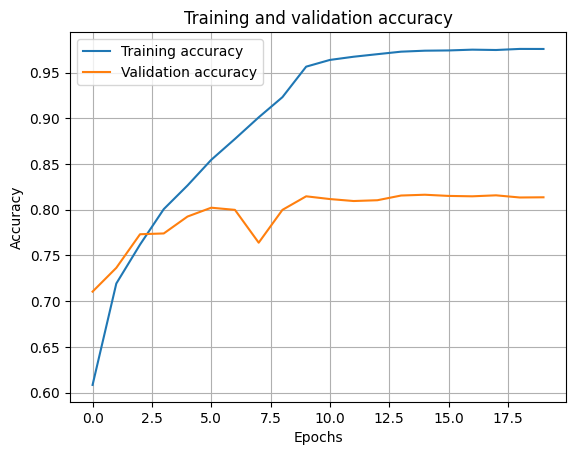

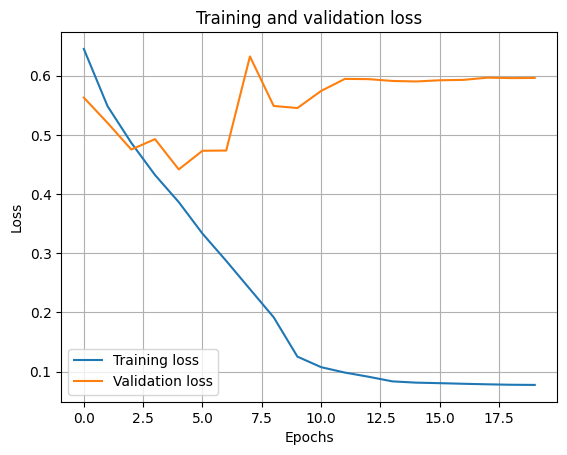

In [18]:
# %matplotlib inline
# %config InlineBackend.fugure_format = 'retina'
# def plot_loss_acc(history):
#   #-----------------------------------------------------------
#   # Retrieve a list of list results on training and test data
#   # sets for each training epoch
#   #-----------------------------------------------------------
#   acc      = history.history[     'accuracy' ]
#   val_acc  = history.history[ 'val_accuracy' ]
#   loss     = history.history[    'loss' ]
#   val_loss = history.history['val_loss' ]
#   epochs   = range(len(acc)) # Get number of epochs
#   #------------------------------------------------
#   # Plot training and validation accuracy per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     acc, label='Training accuracy' )
#   plt.plot  ( epochs, val_acc, label='Validation accuracy' )
#   plt.title ('Training and validation accuracy')
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Accuracy")
#   plt.figure()
#   #------------------------------------------------
#   # Plot training and validation loss per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     loss, label='Training loss' )
#   plt.plot  ( epochs, val_loss, label='Validation loss' )
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Loss")
#   plt.title ('Training and validation loss'   )

# # Plot training results
# plot_loss_acc(history)


In [16]:
# model.save("mymodel.h5")